In [1]:
# Alexis Blackwell
# Ice 3
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [2]:
listen_count = pd.read_csv('train_triplets.txt.zip', header=None, delimiter='\t') # read in csv file
listen_count.head()  # user - song - count 

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [3]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

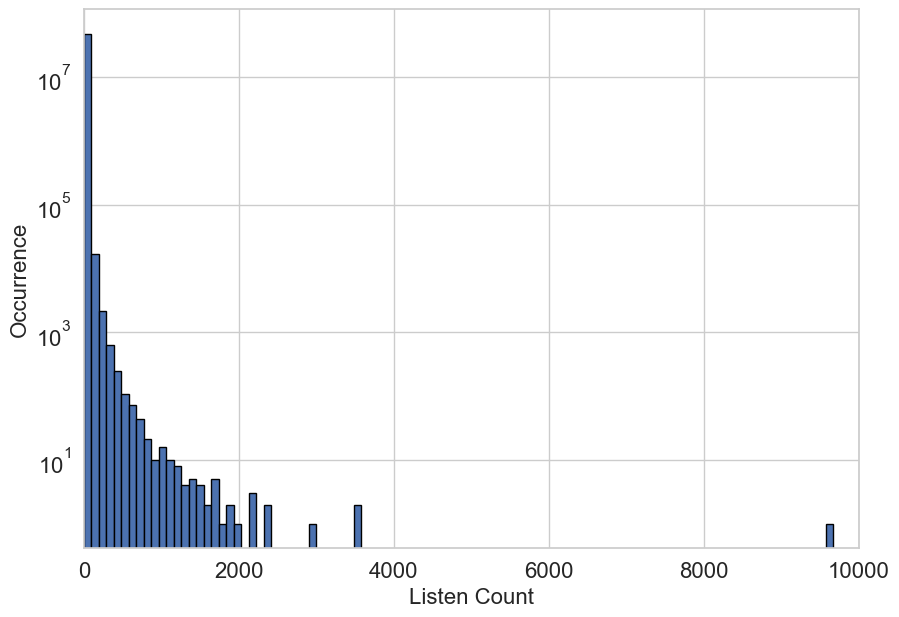

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [5]:
# write your code here
athlete_csv = pd.read_csv(r'C:\Users\black\CSCE5222_Feature_Engineering\Feature_Engineering_ICE_3\archive\Athletes.csv',
                          encoding="latin-1") # open csv file
athlete_csv.head() # check

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


This first step is just to read in the data from the CSV file and make sure to read that data into a Dataframe. This will be useful for later steps which involve plotting this data and performing data manipulation.

## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [6]:
print(athlete_csv.NOC.unique().tolist()) # converts unique values to a list
countries = athlete_csv.NOC.unique().tolist() # converts those unique countries to a list
size_countries = len(countries) # get number of countries
print(size_countries) # check
np.max(athlete_csv['NOC']) # see max country

['Norway', 'Spain', 'Italy', 'France', 'Chile', 'Sudan', 'Islamic Republic of Iran', 'Azerbaijan', 'Netherlands', 'Australia', 'United States of America', 'Qatar', 'Egypt', 'Belgium', 'Malaysia', 'Singapore', 'Maldives', 'Saudi Arabia', 'Germany', 'Uzbekistan', 'Indonesia', 'Kazakhstan', 'Bahrain', 'Japan', 'Ethiopia', 'Canada', 'Malta', 'Sri Lanka', 'Morocco', 'Austria', 'Mauritania', 'ROC', 'Libya', 'Nauru', 'Switzerland', 'South Africa', 'Guyana', 'Georgia', 'Portugal', 'Jordan', 'Palestine', 'India', 'Cyprus', 'Nigeria', 'Tunisia', 'Mexico', 'Colombia', 'El Salvador', 'Romania', 'Poland', 'Federated States of Micronesia', 'Brazil', 'Turkey', 'Sweden', 'Great Britain', 'Hungary', 'Lithuania', 'Puerto Rico', 'Angola', 'Congo', 'Monaco', 'Rwanda', 'Kenya', 'Armenia', 'Samoa', 'Brunei Darussalam', 'Bangladesh', 'Benin', "Côte d'Ivoire", 'Trinidad and Tobago', "People's Republic of China", 'Senegal', 'Algeria', 'Tajikistan', 'Pakistan', 'Kyrgyzstan', 'Latvia', 'Oman', 'Kuwait', 'Iraq', 

'Zimbabwe'

In [7]:
# write you code here
# Binarize the data
a_c = athlete_csv['NOC'].value_counts() # count each athelete for each country
print(a_c) # display results

United States of America       615
Japan                          586
Australia                      470
People's Republic of China     401
Germany                        400
                              ... 
United Republic of Tanzania      2
Saint Kitts and Nevis            2
Marshall Islands                 2
Vanuatu                          2
South Sudan                      2
Name: NOC, Length: 206, dtype: int64


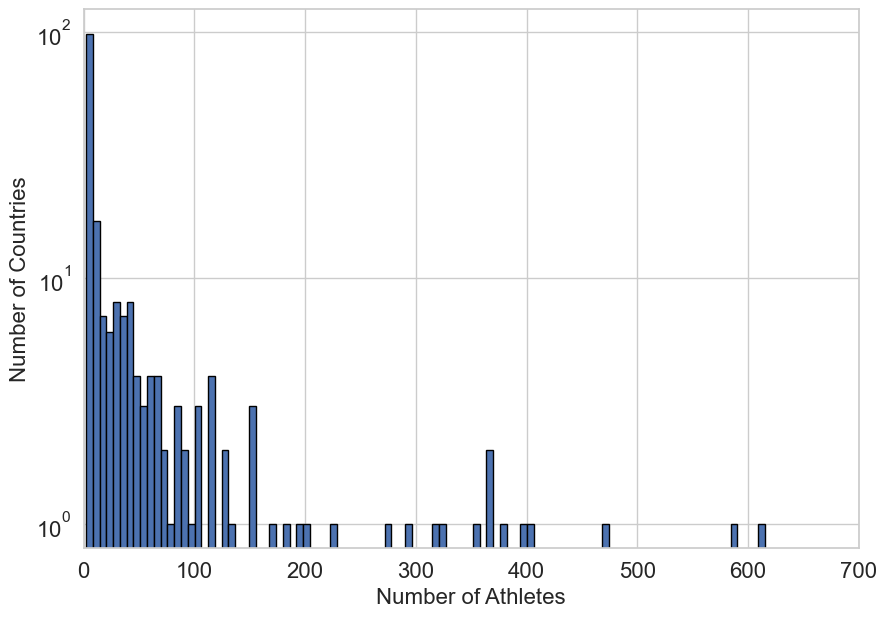

In [8]:
# Plot the Graph
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(a_c, bins = 100, edgecolor='black')
plt.yscale(value='log')#nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,700])
_ = plt.xlabel('Number of Athletes', fontsize=16)
_ = plt.ylabel('Number of Countries', fontsize=16)

After plotting the graph of number of Athletes vs the Number of Countries, it can be seen that the data is tail-heavy. This means that the majority of the data is at the smaller numbers with a few larger numbers spread towards the end of the graph. Overall, this shows a skew in the data.

## **(Tutorial) Quantizing data**

In [9]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([13,  1, 92, 55, 92, 30, 58, 57, 68, 16, 57, 43, 51,  7, 21, 78, 51,
        3, 30, 14])

In [10]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([1, 0, 9, 5, 9, 3, 5, 5, 6, 1, 5, 4, 5, 0, 2, 7, 5, 0, 3, 1],
      dtype=int32)

In [11]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [12]:
import json

In [13]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [14]:
biz_df = load_json_df(r'C:\Users\black\CSCE5222_Feature_Engineering\Feature_Engineering_ICE_3\yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [15]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [16]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

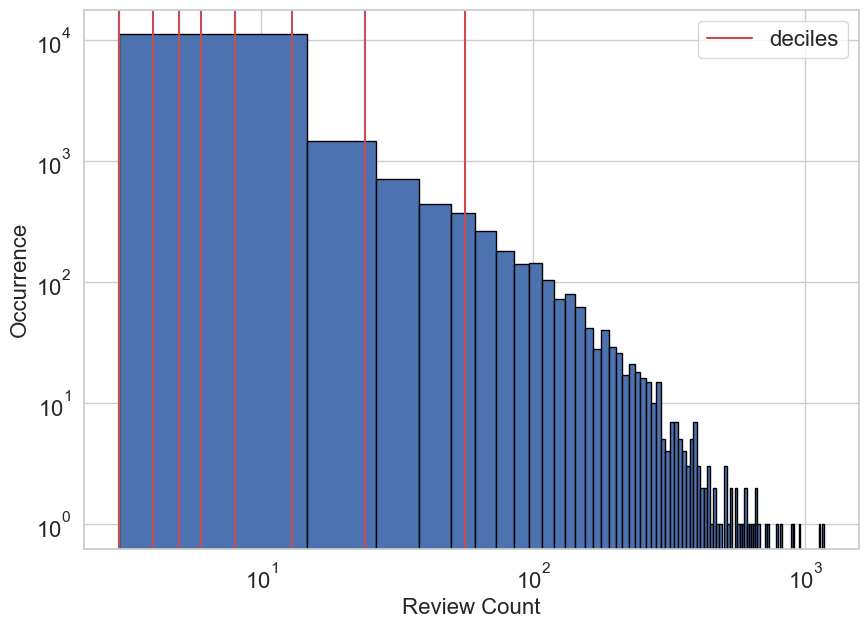

In [17]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

In [69]:
# write the code here
deciles = a_c.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) # compute the quantile of athletes
deciles # check values
log = np.log2(a_c)
log_values = pd.DataFrame(data=log)

In [70]:
log_values.head()

,NOC
United States of America,9.264443
Japan,9.194757
Australia,8.876517
People's Republic of China,8.647458
Germany,8.643856


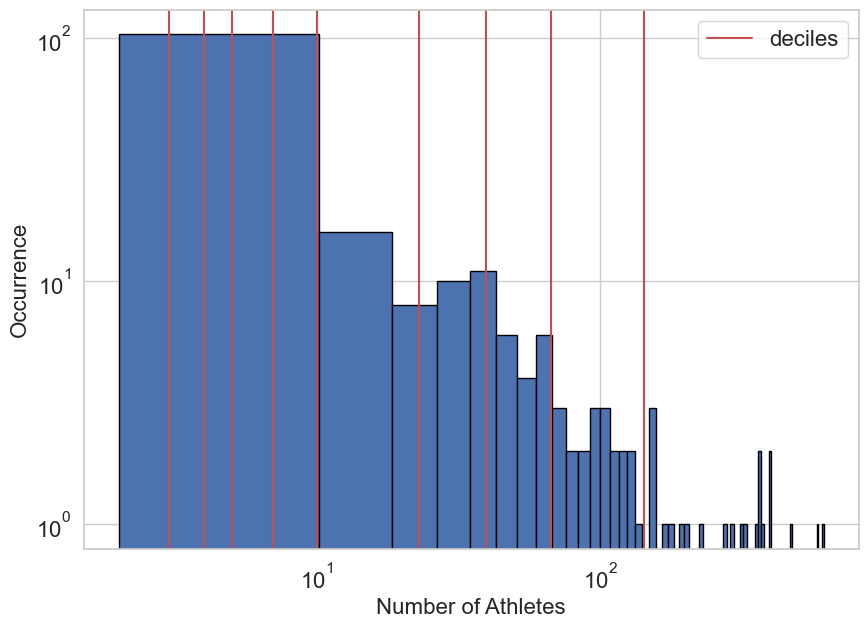

In [71]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
a_c.hist(ax=ax, bins=75, edgecolor='black') # plot the histogram using the original data
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) # use the deciles in the legend
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Number of Athletes', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

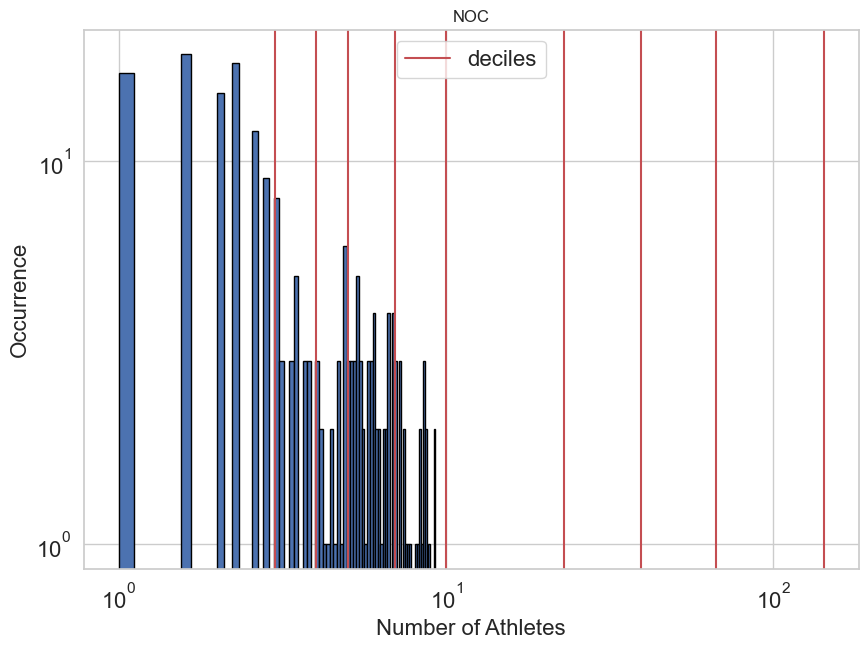

In [72]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
log_values.hist(ax=ax, bins=75, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Number of Athletes', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

After plotting this graph, it can be seen that the data is slightly more spread out after converting the data from the base values to the log values. More of the data is found towards the larger numbers with less data being found in the beginning of the graph. Based on the graphs generated it seems as though the data is more spread out.

## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

We need the log transform in order to accurately 

---


## **(Tutorial) Box-Cox transform**

In [20]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

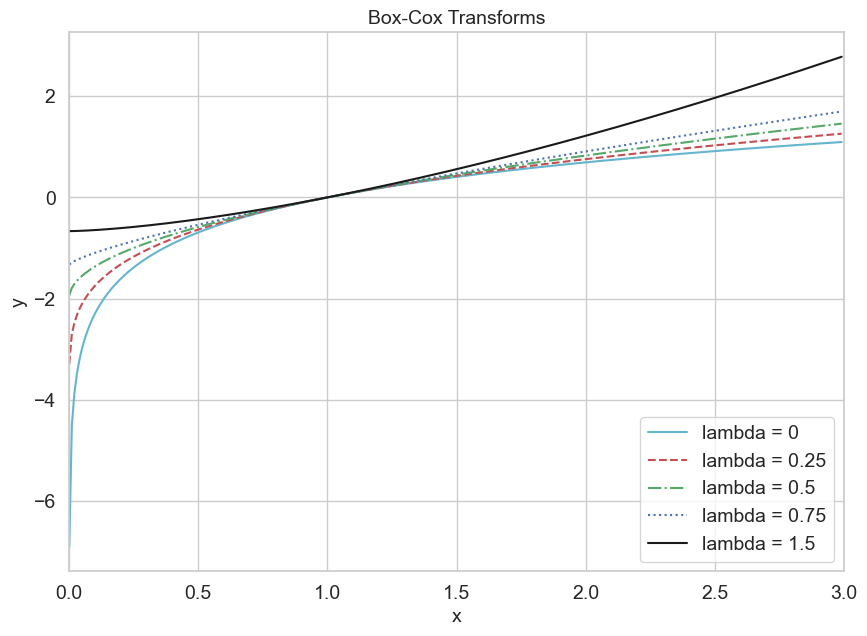

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [22]:
from scipy import stats

In [23]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

In [24]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,rc_bc,rc_log
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business,1.549713,3.367296
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business,0.828300,1.098612
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business,1.203501,1.945910
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business,0.975365,1.386294
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business,0.828300,1.098612


Text(0, 0.5, 'Occurrence')

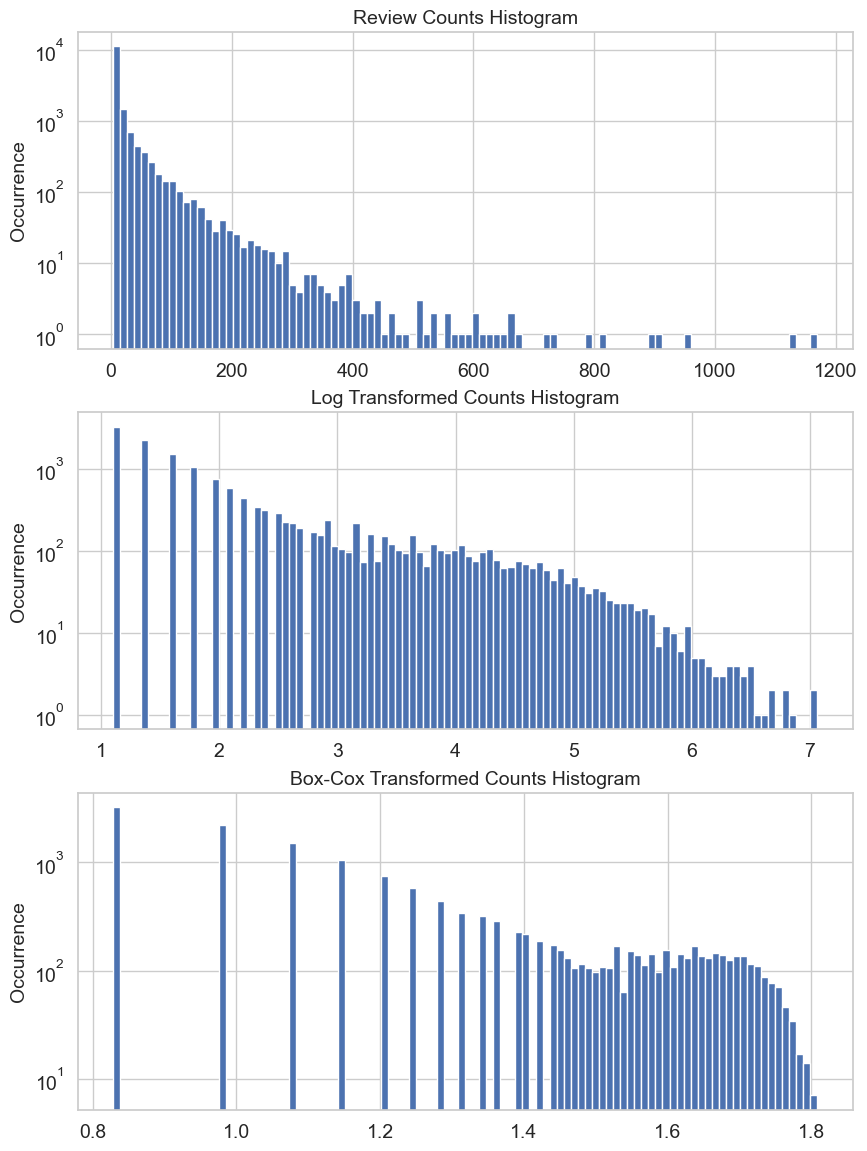

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

In [26]:
# write your code here
# data conversion
ac_log = stats.boxcox(a_c, lmbda=0)
ac_bc, bc_params = stats.boxcox(a_c)
plot_data = pd.DataFrame()
plot_data['Countries'] = countries
plot_data['Log'] = ac_log
plot_data['Box-Cox'] = ac_bc

In [27]:
plot_data.head()

,Countries,Log,Box-Cox
0,Norway,6.421622,3.541425
1,Spain,6.373320,3.528677
2,Italy,6.152733,3.468800
3,France,5.993961,3.423968
4,Chile,5.991465,3.423251


Text(0, 0.5, 'Occurrence')

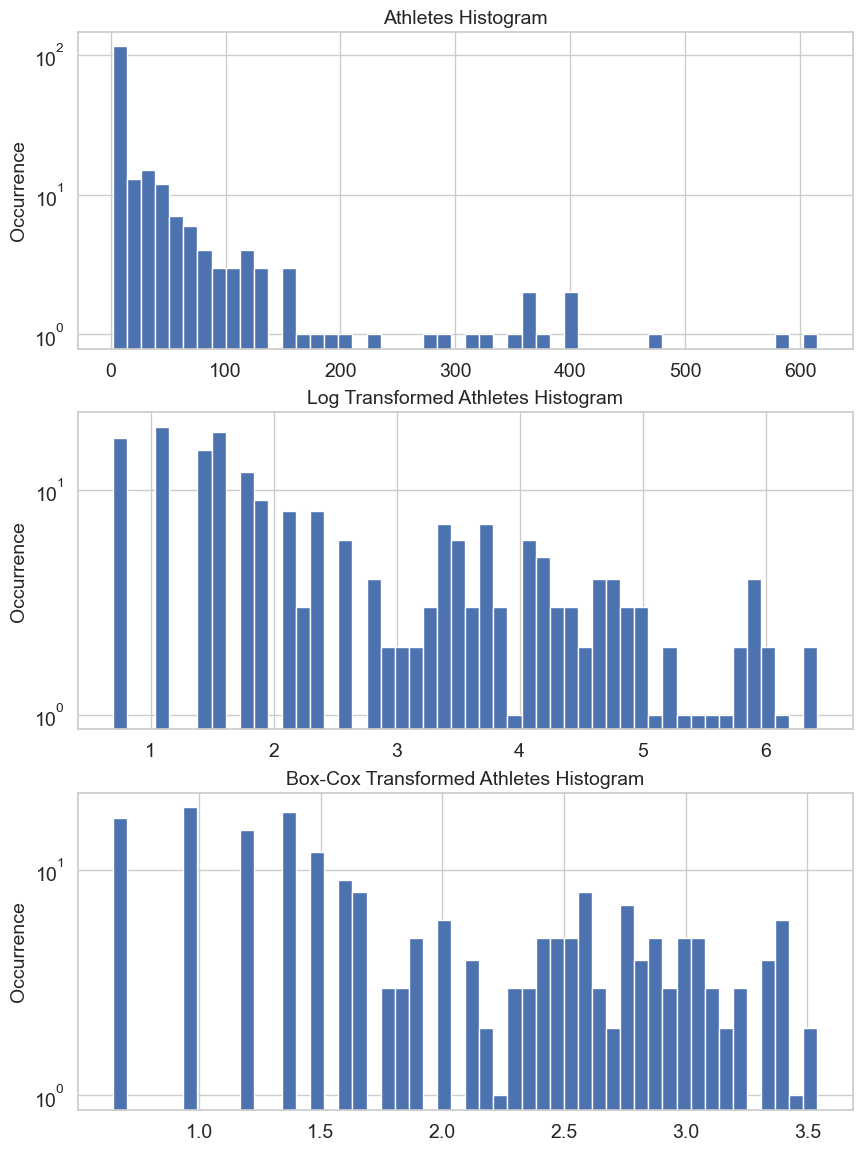

In [28]:
# plot figures
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))
bin_s = 50 # smaller than 100 due to less data
# Original
a_c.hist(ax=ax1, bins=bin_s)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Athletes Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# Log Transform
plot_data['Log'].hist(ax=ax2, bins=bin_s)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Athletes Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox
plot_data['Box-Cox'].hist(ax=ax3, bins=bin_s)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Athletes Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

Based on the graphs generated above, it would seem as though both the log transform and the Box-Cox transfrom do spread the data out to generate a more equal dataset. The original data is tail-heavy and that data present at the beginning of the graph would bias any model that uses the untransformed data. Both the log transform and the Box-Cox transform reduce the amount of skew that is present in the data as show by the graphs. The Box-Cox seems based on visuals, to have the most even distribution of data though the Log transform is also fairly equalized.

## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:** write your answer here

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [29]:
import sklearn.preprocessing as preproc

In [30]:
news_df = pd.read_csv(r'C:\Users\black\CSCE5222_Feature_Engineering\Feature_Engineering_ICE_3\OnlineNewsPopularity\OnlineNewsPopularity\OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [31]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [32]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [33]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 44.249999999999986, 'L2-normalized word count')

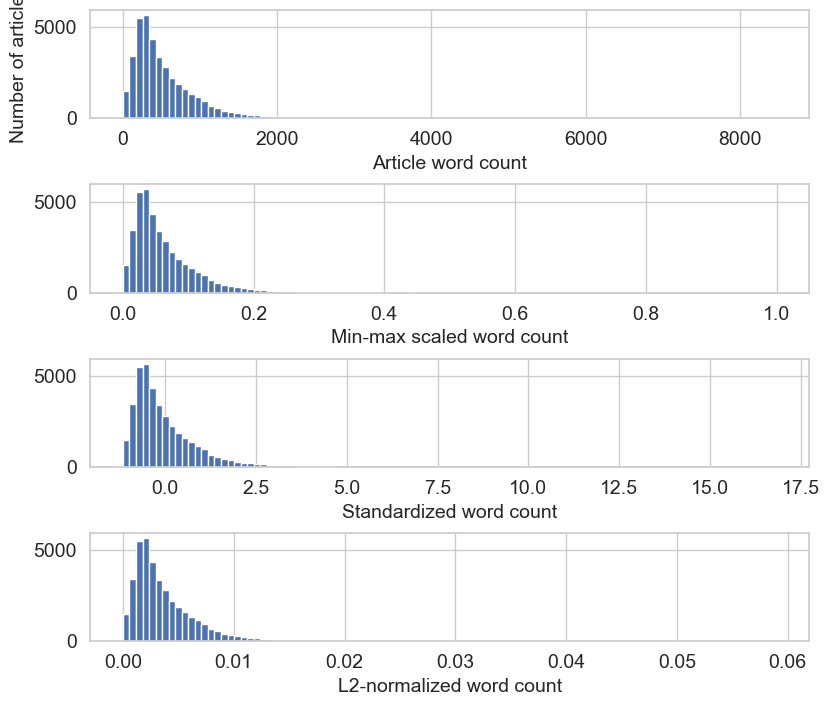

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

In [35]:
# write your code here
# Min-max scaling
dataset = pd.DataFrame()
dataset['Original'] = a_c
dataset['Minmax'] = preproc.minmax_scale(a_c) #use minmax scale
display(dataset)

,Original,Minmax
United States of America,615,1.000000
Japan,586,0.952692
Australia,470,0.763458
People's Republic of China,401,0.650897
Germany,400,0.649266
...,...,...
United Republic of Tanzania,2,0.000000
Saint Kitts and Nevis,2,0.000000
Marshall Islands,2,0.000000
Vanuatu,2,0.000000


In [36]:
# Standardization
dataset['Standardized'] = preproc.StandardScaler().fit_transform(dataset[['Original']]) # use the Standard Scaler
display(dataset)

,Original,Minmax,Standardized
United States of America,615,1.000000,5.526837
Japan,586,0.952692,5.241232
Australia,470,0.763458,4.098814
People's Republic of China,401,0.650897,3.419272
Germany,400,0.649266,3.409423
...,...,...,...
United Republic of Tanzania,2,0.000000,-0.510254
Saint Kitts and Nevis,2,0.000000,-0.510254
Marshall Islands,2,0.000000,-0.510254
Vanuatu,2,0.000000,-0.510254


In [37]:
# L2-normalization
dataset['L2_normalized'] = preproc.normalize(dataset[['Original']], axis=0) # normalize the original values
display(dataset)

,Original,Minmax,Standardized,L2_normalized
United States of America,615,1.000000,5.526837,0.372872
Japan,586,0.952692,5.241232,0.355290
Australia,470,0.763458,4.098814,0.284959
People's Republic of China,401,0.650897,3.419272,0.243125
Germany,400,0.649266,3.409423,0.242518
...,...,...,...,...
United Republic of Tanzania,2,0.000000,-0.510254,0.001213
Saint Kitts and Nevis,2,0.000000,-0.510254,0.001213
Marshall Islands,2,0.000000,-0.510254,0.001213
Vanuatu,2,0.000000,-0.510254,0.001213


Text(0.5, 44.249999999999986, 'L2-normalized athletes')

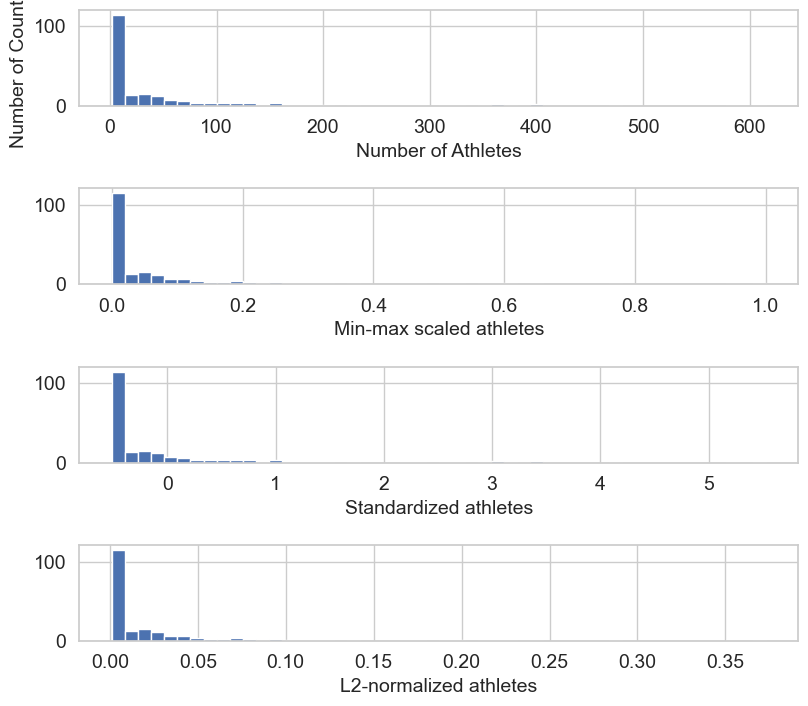

In [74]:
# plot the feature scaling
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=3.0)

num_bins = 50
dataset['Original'].hist(ax=ax1, bins=num_bins)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Athletes', fontsize=14)
ax1.set_ylabel('Number of Countries', fontsize=14)

dataset['Minmax'].hist(ax=ax2, bins=num_bins)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled athletes', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

dataset['Standardized'].hist(ax=ax3, bins=num_bins)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized athletes', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

dataset['L2_normalized'].hist(ax=ax4, bins=num_bins)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized athletes', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

Overall, the idea behind feature scaling is to reduce the bias that large data values have on a model. Datasets that have a skew of a large amount of data around a single value can cause issues in the model. Min-max aims to scale the feature by assigning values between a minimum and a maximum range. Standardization works by centering the data around 0 and then incorporating a standard deviation of 1. Lastly L2 normalized word count works by calculating the sum of squares for each row in the dataset. This sum of squares value is then used to normalize the data by aiming to force the sum of squares values to be equal to 1. From the graphs plotted above, this can be seen as the x values in the min-max scaled graph range from 0 to about .2. The standardized athletes graph has a range of about -1 to 1, and the L2-normalized athlete graph has a scale of approximately 0 to .7.

## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: type your answer here

---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** type your answer here

---


## Example of interaction features in prediction

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [40]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [41]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [42]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [43]:
display(X)
display(y)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0


,shares
0,593
1,711
2,1500
3,1200
4,505
...,...
39639,1800
39640,1900
39641,1900
39642,1100


In [44]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [45]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [46]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113228095


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [47]:
# write your code here
# load data
bean_df = pd.read_csv(r'C:\Users\black\CSCE5222_Feature_Engineering\Feature_Engineering_ICE_3\DryBeanDataset\DryBeanDataset\Dry_Bean_Dataset.csv',engine = 'python') 
bean_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [48]:
class_values = bean_df.Class.unique().tolist()
print(class_values)
bean_features = [ # store the features
    'Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter',
    'Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']


In [49]:
X_b = bean_df[bean_features]

# bin the data based on the class
df_beanclass = pd.DataFrame(columns=['Class'])
for i in range(0,13611):
    if bean_df.iloc[i]['Class'] == 'SEKER':
        df_beanclass.loc[i,'Class'] = 1
    elif bean_df.iloc[i]['Class'] == 'BARBUNYA':
        df_beanclass.loc[i,'Class'] = 2
    elif bean_df.iloc[i]['Class'] == 'BOMBAY':
        df_beanclass.loc[i,'Class'] = 3
    elif bean_df.iloc[i]['Class'] == 'CALI':
        df_beanclass.loc[i,'Class'] = 4
    elif bean_df.iloc[i]['Class'] == 'HOROZ':
        df_beanclass.loc[i,'Class'] = 5
    elif bean_df.iloc[i]['Class'] == 'SIRA':
        df_beanclass.loc[i,'Class'] = 6
    elif bean_df.iloc[i]['Class'] == 'DERMASON':
        df_beanclass.loc[i,'Class'] = 7

display(df_beanclass)
y_b = df_beanclass[['Class']]

X_b.shape

,Class
0,1
1,1
2,1
3,1
4,1
...,...
13606,7
13607,7
13608,7
13609,7


(13611, 16)

In [50]:
display(X_b) # check
display(y_b) # check

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


,Class
0,1
1,1
2,1
3,1
4,1
...,...
13606,7
13607,7
13608,7
13609,7


In [51]:
X2_b = preproc.PolynomialFeatures(include_bias=False).fit_transform(X_b) # this step generates polynomial and interaction features
# split the data into training and testing datasets
X1_b_train, X1_b_test, X2_b_train, X2_b_test, y_b_train, y_b_test = train_test_split(X_b, X2_b, y_b, test_size=0.3,random_state=123)

In [52]:
(mb1, rb1) = evaluate_feature(X1_b_train, X1_b_test, y_b_train, y_b_test) # run evaluation 
print("R-squared score with singleton features: %0.5f" % rb1) # print results

(mb2, rb2) = evaluate_feature(X2_b_train, X2_b_test, y_b_train, y_b_test) # run evaluation
print("R-squared score with pairwise features: %0.10f" % rb2) # print results

R-squared score with singleton features: 0.78178
R-squared score with pairwise features: 0.8493158410


From the R-squared score, it can be seen that the the pairwise features has the higher R-squared score with .849. The singleton feature still has a good R-squared score of .781 which shows that the singleton features would work well in this model as R-squared scores range from 0 to 1. However, since the R-squared score is higher for the pairwise features, this could indicate that pairwise features work best in this model.